# Fake News Detection - Data Exploration

This notebook explores the Fake and Real News dataset.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
plt.style.use('seaborn-v0_8')
sns.set_palette('husl')

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 100)

## 1. Load the Dataset

In [2]:
# Load datasets
fake_df = pd.read_csv('../data/raw/Fake.csv')
true_df = pd.read_csv('../data/raw/True.csv')

# Add labels
fake_df['label'] = 0  # Fake news
true_df['label'] = 1  # Real news

# Combine datasets
df = pd.concat([fake_df, true_df], ignore_index=True)

print(f"Total samples: {len(df):,}")
print(f"Fake news: {len(fake_df):,}")
print(f"Real news: {len(true_df):,}")

Total samples: 44,898
Fake news: 23,481
Real news: 21,417


## 2. Dataset Overview

In [3]:
# Display first few rows
df.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing,"Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he...",News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian Collusion Investigation,House Intelligence Committee Chairman Devin Nunes is going to have a bad day. He s been under th...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke For Threatening To Poke People ‘In The Eye’,"On Friday, it was revealed that former Milwaukee Sheriff David Clarke, who was being considered ...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name Coded Into His Website (IMAGES),"On Christmas day, Donald Trump announced that he would be back to work the following day, but ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump During His Christmas Speech,Pope Francis used his annual Christmas Day message to rebuke Donald Trump without even mentionin...,News,"December 25, 2017",0


In [4]:
# Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


In [5]:
# Check for missing values
df.isnull().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

## 3. Class Distribution

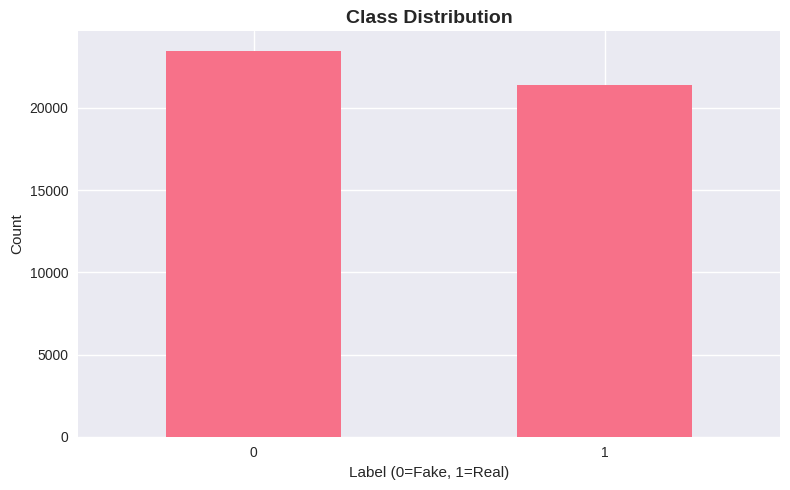

label
0    23481
1    21417
Name: count, dtype: int64

Class balance: label
0    0.522985
1    0.477015
Name: proportion, dtype: float64


In [6]:
# Class distribution
plt.figure(figsize=(8, 5))
df['label'].value_counts().plot(kind='bar')
plt.title('Class Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Label (0=Fake, 1=Real)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

print(df['label'].value_counts())
print(f"\nClass balance: {df['label'].value_counts(normalize=True)}")

## 4. Text Length Analysis

In [7]:
# Add text length columns
df['title_length'] = df['title'].str.len()
df['text_length'] = df['text'].str.len()
df['word_count'] = df['text'].str.split().str.len()

# Display statistics
df[['title_length', 'text_length', 'word_count']].describe()

,title_length,text_length,word_count
count,44898.000000,44898.000000,44898.000000
mean,80.111720,2469.109693,405.282284
std,25.379685,2171.617091,351.265595
min,8.000000,1.000000,0.000000
25%,63.000000,1234.000000,203.000000
50%,73.000000,2186.000000,362.000000
75%,91.000000,3105.000000,513.000000
max,286.000000,51794.000000,8135.000000


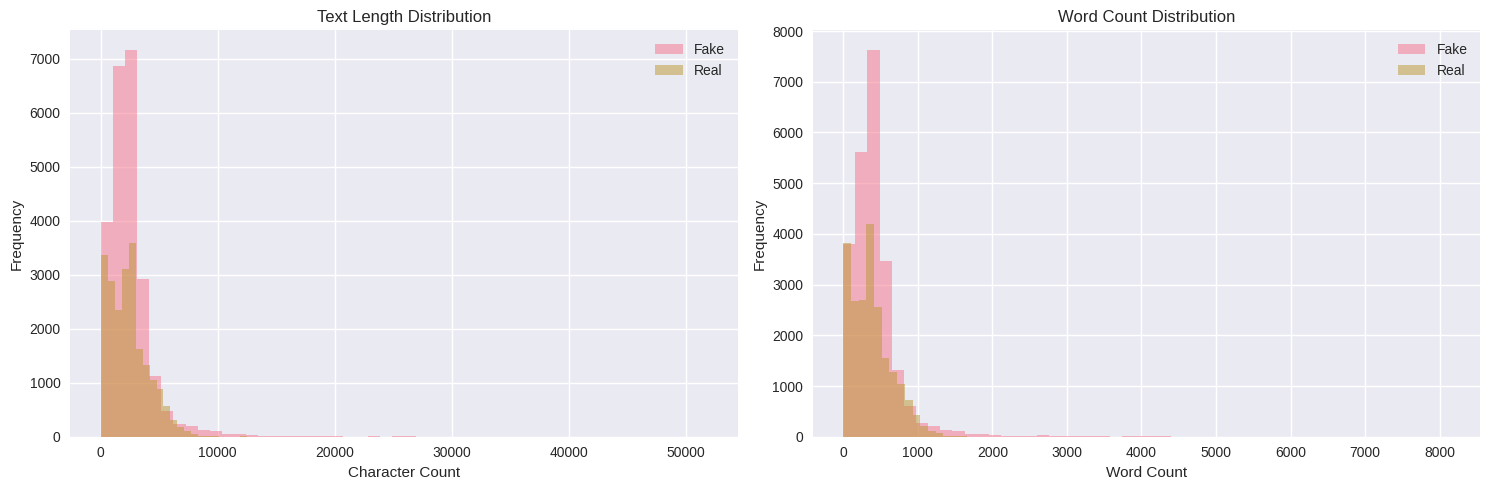

In [8]:
# Text length distribution by label
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Text length
df[df['label']==0]['text_length'].hist(bins=50, alpha=0.5, label='Fake', ax=axes[0])
df[df['label']==1]['text_length'].hist(bins=50, alpha=0.5, label='Real', ax=axes[0])
axes[0].set_title('Text Length Distribution')
axes[0].set_xlabel('Character Count')
axes[0].set_ylabel('Frequency')
axes[0].legend()

# Word count
df[df['label']==0]['word_count'].hist(bins=50, alpha=0.5, label='Fake', ax=axes[1])
df[df['label']==1]['word_count'].hist(bins=50, alpha=0.5, label='Real', ax=axes[1])
axes[1].set_title('Word Count Distribution')
axes[1].set_xlabel('Word Count')
axes[1].set_ylabel('Frequency')
axes[1].legend()

plt.tight_layout()
plt.show()

## 5. Sample Texts

In [9]:
# Display sample fake news
print("FAKE NEWS SAMPLE:")
print("="*80)
print(f"Title: {fake_df.iloc[0]['title']}")
print(f"\nText: {fake_df.iloc[0]['text'][:500]}...")

FAKE NEWS SAMPLE:
Title:  Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing

Text: Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and  the very dishonest fake news media.  The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year,  President Angry Pants tweeted.  2018 will be a gr...


In [10]:
# Display sample real news
print("REAL NEWS SAMPLE:")
print("="*80)
print(f"Title: {true_df.iloc[0]['title']}")
print(f"\nText: {true_df.iloc[0]['text'][:500]}...")

REAL NEWS SAMPLE:
Title: As U.S. budget fight looms, Republicans flip their fiscal script

Text: WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they retur...


## 6. Subject Distribution

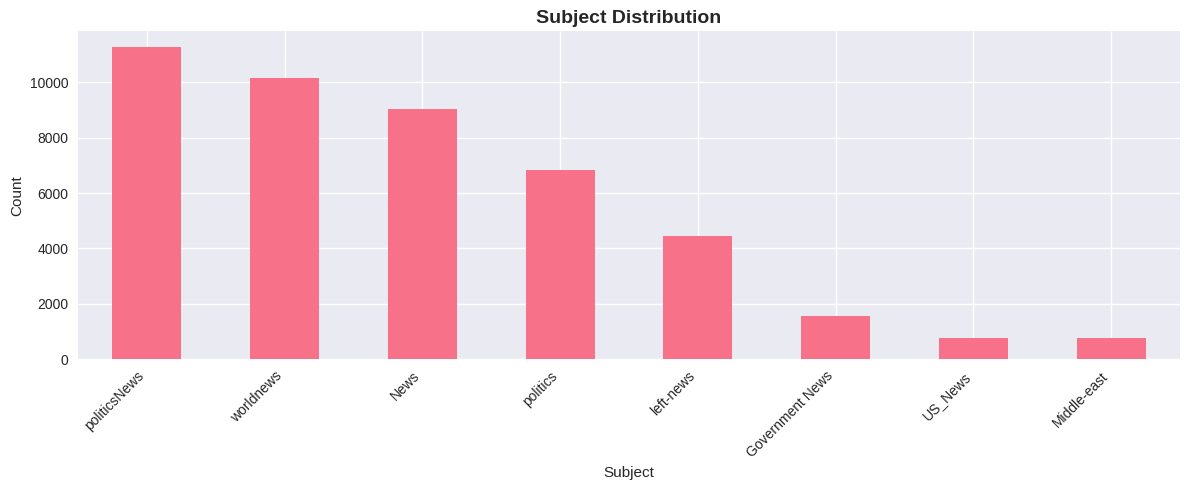

subject
politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: count, dtype: int64


In [11]:
# Subject distribution
if 'subject' in df.columns:
    plt.figure(figsize=(12, 5))
    df['subject'].value_counts().plot(kind='bar')
    plt.title('Subject Distribution', fontsize=14, fontweight='bold')
    plt.xlabel('Subject')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    
    print(df['subject'].value_counts())

## 7. Save Processed Dataset

In [12]:
# Shuffle the data
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Save to processed directory
df.to_csv('../data/processed/combined_news.csv', index=False)
print(f"✅ Dataset saved to data/processed/combined_news.csv")
print(f"Total samples: {len(df):,}")

✅ Dataset saved to data/processed/combined_news.csv
Total samples: 44,898


## Next Steps

- Text preprocessing (cleaning, tokenization, etc.)
- Feature extraction (TF-IDF, Word2Vec, BERT)
- Model training and evaluation